<img src="img/logoifsc.png">
<link rel="stylesheet" href="arvores_de_decisao.css">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Aprendizado Simbólico: Indução de Árvores de Decisão
    
---

## Conteúdo
- Introdução
- Algoritmo Geral
- Running Example
- Exercícios

## Introduçao

- Árvores de Decisão (AD) são uma das técnicas mais populares de mineração de dados.

- As AD consistem em um conjunto de *nós internos* e *nós folhas* que estão organizados hierárquicamente.

<img src="img/admodelo.jpg">

- Essa estrutura permite organizar o processo de decisão.

- Um exemplo, poderia ser uma árvore de decisão para decidir se ir jogar tênis ou não, baseado em alguns atributos climáticos.

<img src="img/adexemplo.jpg">

- Algumas vantagens das árvores de decisão:
    
    - O conhecimento é explícito e interpretável.

    - O processo de tomada de decisão é, além de entendível, explicável.

    - Podem ser representados por meio de símbolos usando a forma **se/então**, por isso é chamado de modelo simbólico.   


### Principais Algoritmos

- Os algoritmos de indução de classificadores que representam o conhecimento adquirido por meio de uma Árvores de Decisão, pertencem a uma família de algoritmos chamados TDIDT (Top Down Induction of Decision Trees).

- Existe uma literatura extensa sobre algoritmos clássicos e adaptadções de algoritmos, mas alguns dos principais:
    - ID3 (Iterative Dichotomiser 3)
        - Proposto por Quinlan em 1986
        - Suporta atributos discretos e classe também discreta.
    - C4.5
        - Proposto por Quinlan em 1993
        - Suporta atributos discretos e contínuos, e classe discreta.
    - M5
        - Proposto por Quinlan em 1992
        - Suporta atributos discretos e contínuos, e classe numérica
        - Neste caso, chamam-se árvores de regressão

## Algoritmo Geral

- A idéia geral do algoritmo consiste em dividir o conjunto de dados sucessivamente até que todos nós folha sejam puros.

- Método $AD(X)$
<ol class="algorithm">
    <li>Se todos os exemplos em $X$ são da mesma classe cria-se uma nó folha para essa classe;</li>    
    <li>Caso contrário:</li>
    <ol>
        <li>Mede-se a <b>qualidade</b> de todos os atributos;</li>
        <li>Se nenhum atributo consegue melhorar a organização do conjunto $X$ então cria-se um nó folha para a classe <b>mais frequênte</b>;</li>
        <li>Caso contrário:</li>
        <ol>
           <li>Escolhe o <b>melhor atributo</b> $A$ para $X$;</li>
           <li>Cria-se um nó interno de decisão baseado em $A$;</li>
           <li>Divide-se o conjunto de dados de acordo com os valores de $A$ em subconjuntos $X_j$;</li>
           <li>A partir do nó de decisão cria-se uma aresta para cada valor de $A$ e associa-se cada $X_j$ a uma aresta;</li>
           <li>Para cada conjunto $X_j$ executa-se o método $AD(X_j)$;</li>
        </ol>                  
    </ol>    
</ol>

## Running Example

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/playtennis.txt", sep = " ")
df

,Day,Outlook,Temp,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


Removemos a coluna 'Day', já que não representa uma informação relevante para o domínio do problema.

In [3]:
df = df.drop(['Day'], axis = 1, errors = 'ignore')
df

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


Método $AD$ para $X$
- Esse conjunto de dados possui exemplos de ambas as classes, então vamos medir a qualidade de seus atributos, usando o ganho de informação.

In [4]:
import helper

In [5]:
classe = 'PlayTennis'
helper.ganho_de_informacao_todos(df, classe)

,InformationGain
Outlook,0.246750
Temp,0.029223
Humidity,0.151836
Wind,0.048127


- Temos atributos que produzem ganho de informação, então escolhemos como melhor atributo, aquele que tem o maior ganho.

- O atributo com maior ganho de informação é o atributo **Outlook**, portanto criamos um nó de decisão para esse atributo. E também um conjunto de dados $X_j$ para cada valor do atributo Outlook: Sunny, Overcast, e Rain.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook.jpg">


In [6]:
df_outlook_overcast = df.query('Outlook == "Overcast"')
df_outlook_sunny = df.query('Outlook == "Sunny"')
df_outlook_rain = df.query('Outlook == "Rain"')

- Observem os subconjuntos de dados

In [7]:
df_outlook_overcast

,Outlook,Temp,Humidity,Wind,PlayTennis
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


In [8]:
df_outlook_sunny

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


In [9]:
df_outlook_rain

,Outlook,Temp,Humidity,Wind,PlayTennis
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
9,Rain,Mild,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


Agora temos que aplicar o mesmo método $AD$ para cada um dos subconjuntos $X_1$, $X_2$ e $X_3$.

Método $AD$ para $X_1$

In [10]:
df_outlook_overcast

,Outlook,Temp,Humidity,Wind,PlayTennis
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


- Como todos os exemplos do conjunto de dados $X_1$ são da mesma classe, criamos então o nó folha com essa classe.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_overcast.jpg">


Método $AD$ para $X_2$

In [11]:
df_outlook_rain

,Outlook,Temp,Humidity,Wind,PlayTennis
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
9,Rain,Mild,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


- Como temos exemplos em $X_2$ de classes diferentes então precisamos medir a qualidade dos atributos para verificar se algum atributo permite melhorar a organização dos dados

In [12]:
helper.ganho_de_informacao_todos(df_outlook_rain, classe)

,InformationGain
Outlook,0.000000
Temp,0.019973
Humidity,0.019973
Wind,0.970951


- O atributo **Wind** apresentou o maior ganho de informação, portanto é o atributo escolhido para fazer um nó de decisão.

- Criamos um conjunto de dados $X_{2,j}$ para cada valor do atributo Wind: Strong e Weak.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_wind.jpg">


In [13]:
df_outlook_rain_wind_strong = df_outlook_rain.query('Wind == "Strong"') # X_{2,1}
df_outlook_rain_wind_weak = df_outlook_rain.query('Wind == "Weak"') # X_{2,1}

- Observamos os conjuntos de dados

In [14]:
df_outlook_rain_wind_strong

,Outlook,Temp,Humidity,Wind,PlayTennis
5,Rain,Cool,Normal,Strong,No
13,Rain,Mild,High,Strong,No


In [15]:
df_outlook_rain_wind_weak

,Outlook,Temp,Humidity,Wind,PlayTennis
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


Temos que aplicar o mesmo método $AD$ para cada um dos subconjuntos $X_{2,1}$ e $X_{2,2}$.

Método $AD$ para $X_{2,1}$

In [16]:
df_outlook_rain_wind_strong

,Outlook,Temp,Humidity,Wind,PlayTennis
5,Rain,Cool,Normal,Strong,No
13,Rain,Mild,High,Strong,No


- Como temos exemplos apenas da classe `PlayTennis = No` criamos um nó folha para essa classe.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_wind_strong.jpg">

Método $AD$ para $X_{2,2}$

In [17]:
df_outlook_rain_wind_weak

,Outlook,Temp,Humidity,Wind,PlayTennis
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


- Este conjunto de dados também possui exemplos de uma classe, `PlayTennis = Yes`, portanto temos que criar um nó folha para essa classe.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_wind_weak.jpg">

Método $AD$ para $X_{3}$

In [18]:
df_outlook_sunny

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


- Este conjunto de dados possui exemplos de ambas as classes, então vamos calcular a qualidade dos atributos, para verificar se existe algum atributo que permita organizar melhor os dados.

In [19]:
helper.ganho_de_informacao_todos(df_outlook_sunny, classe)

,InformationGain
Outlook,0.000000
Temp,0.570951
Humidity,0.970951
Wind,0.019973


- Verificamos que o atributo que possui melhor qualidade é **Humidity** e escolhemos ele como o nosso melhor atributo.

- Criamos um nó de decisão para o atributo **Humidity**

- Criamos um conjunto de dados $X_{3,j}$ para cada valor do atributo Humdity: High e Normal.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_humidity.jpg">

In [20]:
df_outlook_sunny_humidity_high = df_outlook_sunny.query('Humidity == "High"') # X_{3,1}
df_outlook_sunny_humidity_normal = df_outlook_sunny.query('Humidity == "Normal"') # X_{3,2}

- Observamos os subconjuntos de dados

In [21]:
df_outlook_sunny_humidity_high

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No


In [22]:
df_outlook_sunny_humidity_normal

,Outlook,Temp,Humidity,Wind,PlayTennis
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


Método $AD$ para $X_{3,1}$

In [23]:
df_outlook_sunny_humidity_high

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No


- Este conjunto de dados também possui exemplos de uma classe, $PlayTennis = No$, portanto temos que criar um nó folha para essa classe.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_humidity_high.jpg">

Método $AD$ para $X_{3,2}$

In [24]:
df_outlook_sunny_humidity_normal

,Outlook,Temp,Humidity,Wind,PlayTennis
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


- Este conjunto de dados também possui exemplos de uma classe, $PlayTennis = Yes$, portanto temos que criar um nó folha para essa classe.

- Árvore de Decisão Final

<img src="img/adexemplo.jpg">

## Indução de Árvores de Decisão usando Python

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy')
model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Dividimos o conjunto de dados em `X` e `y`, pois queremos criar uma função $f(X) \rightarrow y$

In [96]:
X = df.drop([classe], axis = 1)
X = pd.get_dummies(X)
y = df[classe]

Ajustamos o modelo aos dados

In [97]:
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Visualizamos a árvore de decisão

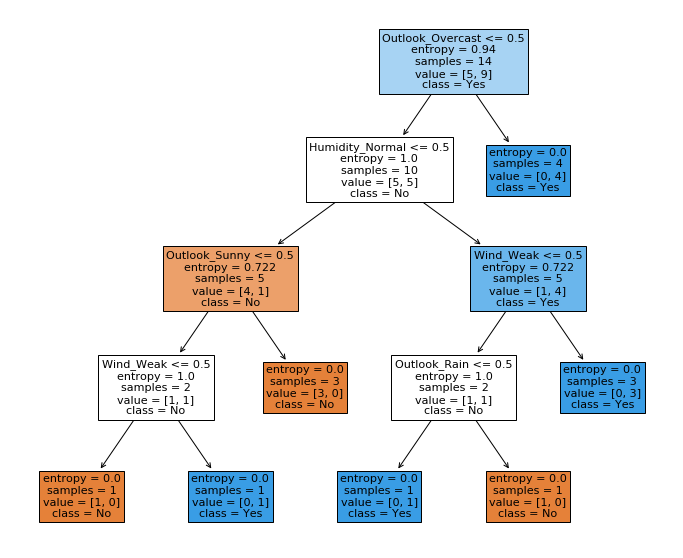

In [98]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10))
plot_tree(model, filled=True, class_names=y.unique(), feature_names = X.columns)
plt.show()

## Árvores de Decisão para Atributos Contínuos e Classe Discreta

### Conjunto de Dados Iris

In [29]:
import seaborn as sns
df_iris = sns.load_dataset("iris")
df_iris.head()                    

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris_classe = 'species'
X = df_iris.drop([iris_classe], axis=1)
y = df_iris[iris_classe]

model_iris = DecisionTreeClassifier()
model_iris.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Visualização da árvore de decisão

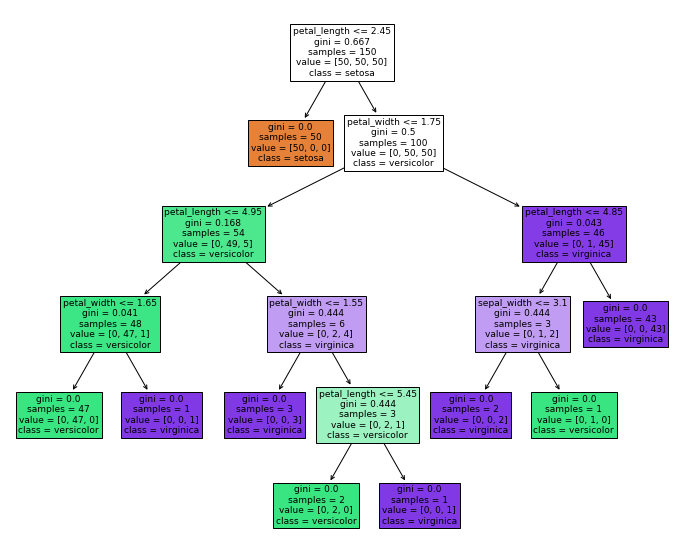

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10))
plot_tree(model_iris, filled=True, class_names=y.unique(), feature_names = X.columns)
plt.show()

- Podemos observar os atributos numéricos foram separados de forma binária.

- Os subconjuntos de dados $X_j$ correspondem aos exemplos que possuem atributo $A$ maior ou menor do que um valor $x_{sp}$, comumente chamado de *split point*.

- Esse *split point* é encontrado fazendo alguns testes no conjunto de dados.

- Esses testes tem como objetivo dividir o conjunto de dados em duas partes, baseado em um atributo $A$ aqueles que são menores ou iguais do que o *split plont* $x_{sp}$ e aqueles que são maiores do que o *split point*.

- Considere o seguinte conjunto de dados, que é uma amostra de 15 exemplos do dataset *iris*.

In [39]:
df_iris15 = df_iris.sample(15, random_state=1)
df_iris15

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica
56,6.3,3.3,4.7,1.6,versicolor
141,6.9,3.1,5.1,2.3,virginica
44,5.1,3.8,1.9,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
120,6.9,3.2,5.7,2.3,virginica


- Vamos analisar o atributo `petal_width`

In [73]:
df_iris15a = df_iris15[['petal_width', iris_classe]]
df_iris15a

,petal_width,species
14,0.2,setosa
98,1.1,versicolor
75,1.4,versicolor
16,0.4,setosa
131,2.0,virginica
56,1.6,versicolor
141,2.3,virginica
44,0.4,setosa
29,0.2,setosa
120,2.3,virginica


- Vamos ordenar o conjunto de dados em ordem decrescente do atributo `petal_width` 

In [74]:
df_iris15a.sort_values(by='petal_width')

,petal_width,species
14,0.2,setosa
29,0.2,setosa
16,0.4,setosa
44,0.4,setosa
5,0.4,setosa
98,1.1,versicolor
94,1.3,versicolor
75,1.4,versicolor
51,1.5,versicolor
78,1.5,versicolor


- Vários split points poderiam ser testados, vamos nos deter apenas a analisar aqueles candidatos a maximizar o ganho de informação.

- Os candidatos a split point nesse conjunto de dados são:
    - Entre 0.4 e 1.3, onde o $x_{sp1} = (0.4+1.3)/2 = 0.85$
    - Entre 1.6 e 2.0, onde o $x_{sp2} = (1.6+2.0)/2 = 1.80$    

In [90]:
sp1 = 0.85
sp2 = 1.80
df_iris15a.loc[:,('petal_width <= sp2')] = df_iris15a['petal_width'].apply(lambda x : x <= sp1).values
df_iris15a.loc[:,('petal_width <= sp2')] = df_iris15a['petal_width'].apply(lambda x : x <= sp2).values
df_iris15a

,petal_width,species,petal_width <= sp1,petal_width <= sp2
14,0.2,setosa,True,True
98,1.1,versicolor,False,True
75,1.4,versicolor,False,True
16,0.4,setosa,True,True
131,2.0,virginica,False,False
56,1.6,versicolor,False,True
141,2.3,virginica,False,False
44,0.4,setosa,True,True
29,0.2,setosa,True,True
120,2.3,virginica,False,False


Conjunto de dados ordenado por `petal_width`

In [91]:
df_iris15a.sort_values(by='petal_width')

,petal_width,species,petal_width <= sp1,petal_width <= sp2
14,0.2,setosa,True,True
29,0.2,setosa,True,True
16,0.4,setosa,True,True
44,0.4,setosa,True,True
5,0.4,setosa,True,True
98,1.1,versicolor,False,True
94,1.3,versicolor,False,True
75,1.4,versicolor,False,True
51,1.5,versicolor,False,True
78,1.5,versicolor,False,True


- Calculando o ganho de informação das três divisões:

In [93]:
helper.ganho_de_informacao(df_iris15a, 'petal_width <= sp1', iris_classe)

0.8366407419411672

In [95]:
helper.ganho_de_informacao(df_iris15a, 'petal_width <= sp2', iris_classe)

0.8366407419411672

- Observamos que o maior ganho de informação foi do split point $x_{sp1}$.

- Por isso, esse é o valor do atributo de `petal_width` que dividiu o conjunto em duas partes, maximizando o ganho de informação.

- Outra forma de escrever isso é:

$$ x_{sp} = arg\,max_{value \in A} \; IG(X,A,value) $$

$$ IG(X,A) = IG(X,A,x_{sp})$$

### Exercício

- Considere o conjunto de dados Iris de 15 exemplos, usado na aula, e para cada um dos atributos `petal_width`, `petal_length`, `sepal_width` e `septal_length`:
    - Encontre os possíveis candidatos a split point;
    - Calcule o ganho de informação para cada split point;
    - Encontre o split point com maior ganho de informação;
    - Verifique qual atributo apresenta o melhor ganho de informação.

### Algoritmos ID3 e J48

- A complexidade desses algoritmos é da ordem $O(n \times m^2)$, onde $n$ é o número de exemplos e $m$ é o número de atributos.

- Os algoritmos são gulosos (*greedy*), pois a cada iteração eles escolhem um atributo de forma gulosa, baseado numa medida importância de atributos, que só olha para o estado atual do problema.

- O algoritmo não é ótimo, pois não explora todas as possíveis árvores para escolher a melhor.

- O algoritmo é completo, pois sempre contrói uma árvore, nem que seja apenas um nó raiz folha que para a classe majoritária.

### Avaliação de Modelos

- A avaliação de modelos tem como objetivo conhecer a performance de um modelo no futuro, seja de classificação ou regressão.

- Para avaliar a performance de um modelo de classificação temos várias medidas, como:
    - Acurácia de classificação
    - Erro de classificação
    - Precisão vs. Recuperação (*Precision* and *Recall*)
    - Medida F (*F-measure*)

- Para extrair essas medidas é preciso construir uma *matriz de confusão* ou *tabela de confusão*

- Seja um problema de duas classes (*postiva* P e *negativa* N) a matriz de confusão de classificação definida por:

| Classe  | Predita P | Predita N  |
| --------------- |:-------------:| -----:|
| **Observada P** | $TP$ | $FN$ |
| **Observada N** | $FP$ | $TN$ |

- onde,
    - $TP$ é *True Positive*
    - $TN$ é *True Negative*
    - $FP$ é *False Postive*
    - $FN$ é *False Negative*

- Exemplo: a avaliação de um modelo $m$ apresenta a seguinte tabela de confusão para 200 exemplos ($N = 200$):

| Classe  | Predita P | Predita N  |
| --------------- |:-------------:| -----:|
| **Observada P** | $TP=90$ | $FN=10$ |
| **Observada N** | $FP=20$ | $TN=80$ |

- Isso significa que, do total de 200 exemplos,
    - 90 exemplos da classe positiva foram classificados como positivos (corretamente)
    - 80 exemplos da classe negativa foram classificados como negativos (corretamente)
    - 10 exemplos da classe positiva foram classificados como negativos (incorretamente)
    - 20 exemplos da classe negativa foram classificados como positivos (incorretamente)


- Baseado nessa tabela de confusão podemos calcular as medidas.

- A **acurácia de classificação** consiste na proporção de exemplos classificados *corretamente* do total de exemplos.

$$ accuracy = \frac{TP + TN}{TP+TN+FP+FN} = \frac{TP + TN}{N} $$

- No exemplo, a **acurácia** do modelo $m$ é dada por:

$$ accuracy(m) = \frac{90 + 80}{200} =  \frac{170}{200} = 0.85$$

- O **erro de classificação** consiste na proporção de exemplos classificados *incorretamente* do total de exemplos.

$$ error = \frac{FP + FN}{TP+TN+FP+FN} = \frac{FP + FN}{N} $$

- No exemplo, o **erro** do modelo $m$ é dado por:

$$ error(m) = \frac{20 + 10}{200} =  \frac{30}{200} = 0.15 $$

- A **precisão** (*precision*) consiste na proporção de exemplos *positivos* classificados *corretamente* do total de exemplos classificados como positivos.

$$ precision = \frac{TP}{TP+FP} $$

- Pode ser entendida como a acurácia sobre os classificados como positivs, e é também chamada de Valor Preditivo Positivo.

- No exemplo, a **precisão** do modelo $m$ é dada por:

$$ precision(m) = \frac{90}{110} = 0.82 $$

- A **recuperção** (*recall*) consiste na proporção de exemplos *positivos* classificados *corretamente* do total de exemplos negativos.

$$ recall = \frac{TP}{TP+FN} $$

- Pode ser entendida como a acurácia sobre a classe positiva, e é chamada de Taxa de Verdadeiros Positivos.

- No exemplo a **recuperação** do modelo $m$ é dada por:

$$ recall(m) = \frac{90}{100} = 0.9 $$

- A partir dos valores de *precision* e *recall* é possível calcular o valor da **medida F** (*F-measure* ou também chamada de *F-score*)

- Essa medida permite balancear os valores de *precision* e *recall* calculando a média armônica de ambas as medidas.

$$ F = 2 \times \frac{precision \times recall}{precision + recall}  $$ 

- No exemplo, a **medida F** do modelo $m$ é dada por:

$$ F = 2 \times \frac{0.82 \times 0.9}{0.82 + 0.9} = 0.86 $$ 

- Portanto, no exemplo apresentado os valores das medidas de avaliação foram os seguintes:

| Medida  | Valor | 
| --------------- |:-------------:|
| **acurácia**    | $0.85$ |
| **erro**        | $0.15$ |
| **precisão**    | $0.82$ |
| **recuperação** | $0.90$ |
| **F-measure**   | $0.86$ |


### Exercício

- Suponha que um novo modelo $m'$ foi contruído com a seguinte tabela de confusão.

| Classe  | Predita P | Predita N  |
| --------------- |:-------------:| ----------:|
| **Observada P** | $TP=85$ | $FN=15$ |
| **Observada N** | $FP=8$ | $TN=92$ |

- Calule os valores das 5 medidas e compare os resultados. 

- Se tivesse que escolher entre esses dois modelos, qual você escolheria?

## Estratégias de Avaliação de Modelos

- Dentro da área de estudos de avaliação de modelos existem diferentes estratégias.

- É importante usar estratégias que permitam estimar o **erro verdadeiro do modelo**.

- O **erro verdadeiro do modelo** é um valor de erro desconhecido, mas muito importante para o futuro da utilização desse modelo. Esse erro vai determinar se, no futuro, o nosso erro de classificaçao será aceitável ou não.

- Como esse erro é desconhecido vamos tentar estimar esse erro usando diferentes estratégias.

- As principais estratégias de avaliação são:

    - Trianing set
  
    - Hold out
        
    - Cross-validation

- **Trianing set**
    - Nesta estratégia avalia-se o modelo utilizando o mesmo conjunto de dados utilizado para construir o modelo, chamado de conjunto de treinamento ou *training set*.
    - Em outras palavras eu uso um conjunto de dados $X_{train}$ para construir um modelo de classificação $m$.
    - Após construído o modelo $m$ classificamos novamente as instâncias $X_{train}$ (sem utilizar o atributo classe) e obtemos uma classe predita para cada exemplo.
    - Construímos a tabela de confusão confrontando a classe predita para os exemplos com a observada em $X_{train}$ e extraímos as medidas de avaliaçao.

- **Hold out**: 
    - Esta estratégia consiste em dividir o conjunto de dados em dois conjuntos: conjunto de treinamento (**training set**) e conjunto de teste (**test set**).
    - Assim, o modelo de classificação $m$ é construído usando o **training set** e testado com o **test set**. 
    - A matriz de confusão para extrair as medidas é baseada na comparação das classes dos exemplos preditas e observadas do **test set**
    - A escolha dos dados é aleatória e pode ser *estratificada* ou não. Será *estratificada* quando conservamos a mesma distribuição de classes no treino e no teste.
    - O percentual para treino e teste pode variar de acordo com o conjunto de dados, mas é bem comum utilizar $2/3$ para treino e $1/3$ para teste.    

- **Cross-validation**:
    - A validação cruzada (*cross-validation*) consiste em separar o conjunto em $n$ partições (*folds*) (que podem ser estratificados ou não).
    - Para cada partição de teste $i$ será construído um modelo $m_i$ utilizando as $n-1$ partições restantes.
    - Cada modelo é testado com a partição de teste (a que partição que ficou de fora do treinamento do modelo).
    - Para calcular as medidas de avaliação podemos construir uma única matriz de confusão ou construir uma para cada modelo e extrair média e desvio padrão das medidas.

- *10-folds cross validation*
    - Um dos tipos mais comuns de validação cruzada e divide o conjunto de dados em 10 partes.
    - São construídos ao todo 10 modelos cada um com seu erro de classficação.
    - Dessa forma é possível ter uma estimativa melhor do erro verdadeiro do modelo.
    - É interessante usar esta estratégia quando observamos que uma estratégia holdout apresenta variações para diferentes execuções.
    - No entanto, para conjuntos de dados muito grandes *holdout* e *cross-validation* tendem a ser parecidos.

- *5x2-folds cross validation*
    - Em algumas ocasiões temos um conjunto de dados menor, por exemplo 200 exemplos.
    - Se dividirmos esse conjunto em 10 partições ficaremos com apenas 20 exemplos para testar em cada modelo.
    - Isso pode gerar uma forte variação do erro de classificação.
    - Nesta estratégia executa-se 5 (cinco) repetições da estratégia *2-folds cross validation*.
    - Dessa forma, são construídos 10 modelos, cada um com o seu erro de classificação.    

- **Erro da classe majoritária**

    - O erro de classificação obtido pela estratégia de avaliação utilizada deve ser comparado inicialmente com o **erro da classe majoritária** ou prevalente.
    
    - Esse erro consiste na maior proporção de exemplos de uma classe no conjunto de dados sob estudo.
    
    - Por exemplo, em um problema de duas classes com 100 exemplos, onde 40 são da classe positiva e 60 são da classe negativa, o erro da classe majoritária é de $0.4$ ou 40\%.   

- **Ganho de Aprendizado** 

    - Podemos pensar em um modelo $m_{majority}$ que apenas "chuta" na classe majoritária.
    
    - Quando conseguirmos melhorar o erro da classe majoritária dizemos que tivemos um **ganho de aprendizado** em relação ao estado inicial do problema.
    
    - Modelos que não melhoram o erro da classe majoritária são comumente retirados da análise pois não conseguiram aprender o suficiente.

- **Construção do Modelo Final**
    - Após executar qualquer estratégia de avaliação de modelos devemos construir o modelo final utilizando **todos os exemplos**.
    - A idéia de ter uma estratégia de avaliação é *estimar* o **erro verdadeiro do modelo**
    - Usar uma estratégia de avaliaçao para achar um modelo "bom" para escolher é um dos erros comuns em mineração de dados. Pois isso seria superestimar o erro verdadeiro do modelo construído, o que será muito difícil de sustentar em classificação futuras.

### Exemplo utilizando o conjunto iris completo

Avaliação usando **Trianing set**:

In [ ]:
library(RWeka)
model.J48 <- J48(Species ~ ., data = iris)
model.J48

In [ ]:
evaluate_Weka_classifier(model.J48, iris)

Avaliar usando **Holdout**

In [ ]:
set.seed(1)
train.size <- round(nrow(iris) * 2/3) # 2/3 para treino
indices <- sample(1:nrow(iris), size= train.size, replace = F)
dt.train <- iris[indices,]
dt.test  <- iris[-indices,]
model.J48 <- J48(Species ~ ., dt.train)

In [ ]:
model.J48

In [ ]:
evaluate_Weka_classifier(model.J48, dt.test)

In [ ]:
evaluate <- evaluate_Weka_classifier(model.J48, dt.test, class = T)
round(evaluate$detailsClass,2)

Avaliar usando **10-folds cross-validation**:

In [ ]:
model.J48 <- J48(Species ~ ., iris)
evaluate_Weka_classifier(model.J48, iris, numFolds = 10, seed = 1)

In [ ]:
evaluate <- evaluate_Weka_classifier(model.J48, iris, numFolds = 10, class = T, seed = 1)
round(evaluate$detailsClass,2)